# Ground Hog dataset creation - 2024

In [35]:
import requests
import pandas as pd
import numpy as np
import folium
import geopandas as gdp
from shapely.geometry import Point

# Get the latest Ground Hog data

In [4]:
# Getting the data from the API
res = requests.get("https://groundhog-day.com/api/v1/groundhogs")

In [5]:
res.json()

{'groundhogs': [{'id': 1,
   'slug': 'punxsutawney-phil',
   'shortname': 'Phil',
   'name': 'Punxsutawney Phil',
   'city': 'Punxsutawney',
   'region': 'Pennsylvania',
   'country': 'USA',
   'coordinates': '40.9311988,-78.9622483',
   'source': 'https://www.groundhog.org/history-past-predictions',
   'contact': '',
   'currentPrediction': 'https://www.npr.org/2024/02/02/1228547493/groundhog-day-punxsutawney-phil-spring',
   'isGroundhog': 1,
   'type': 'Groundhog',
   'active': 1,
   'successor': '',
   'description': 'Punxsutawney Phil is a superstar prognosticating groundhog from Punxsutawney, Pennsylvania. He makes his predictions from his burrow on Gobler’s Knob. According to legend, Phil has made weather prognostications since 1886, owing his improbably long life to the miraculous “groundhog nog” administered at the annual Groundhog Picnic.',
   'image': 'https://groundhog-day.com/images/ghogs/punxsutawney-phil.jpeg',
   'predictionsCount': 129,
   'predictions': [{'year': 1886

In [7]:
# Converting the data into the dataframe
hogs = pd.DataFrame(res.json()["groundhogs"])

In [8]:
# Making sure the data is converted into a dataframe
hogs.head()

,id,slug,shortname,name,city,region,country,coordinates,source,contact,currentPrediction,isGroundhog,type,active,successor,description,image,predictionsCount,predictions
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,https://www.npr.org/2024/02/02/1228547493/grou...,1,Groundhog,1,,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129,"[{'year': 1886, 'shadow': None, 'details': 'Gr..."
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",http://home.ptd.net/\%7Emsvitale/index.html,,https://www.fox43.com/article/news/local/groun...,0,Taxidermied groundhog,1,,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,92,"[{'year': 1926, 'shadow': 1, 'details': ''}, {..."
2,3,wiarton-willie,Willie,Wiarton Willie,Wiarton,Ontario,Canada,"44.7438686,-81.1386838",https://www.southbrucepeninsula.com/en/explore...,,https://www.owensoundsuntimes.com/news/wiarton...,1,Groundhog,1,,Wiarton Wille is Canada’s most famous prognost...,https://groundhog-day.com/images/ghogs/wiarton...,61,"[{'year': 1955, 'shadow': 0, 'details': 'No Sh..."
3,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,Wisconsin,USA,"43.1826322,-89.2143204",https://www.cityofsunprairie.com/840/Groundhog...,visit@cityofsunprairie.com,https://www.marshfieldnewsherald.com/story/new...,1,Groundhog,1,,"Jimmy the Groundhog is based in Sun Prairie, W...",https://groundhog-day.com/images/ghogs/jimmy-t...,56,"[{'year': 1969, 'shadow': 1, 'details': ''}, {..."
4,5,concord-charlie,Charlie,Concord Charlie,Athens,West Virginia,USA,"37.4245956,-81.0095902",https://www.concord.edu/?s=concord+charlie,,https://www.lootpress.com/concord-charlie-pred...,0,Presumed groundhog,1,,Concord Charlie is a presumed groundhog from A...,https://groundhog-day.com/images/ghogs/concord...,46,"[{'year': 1979, 'shadow': 1, 'details': ''}, {..."


In [9]:
# Dropping the meta data in the predictions column

hogs = hogs.drop(['predictions'], axis=1)

In [10]:
hogs.head()

,id,slug,shortname,name,city,region,country,coordinates,source,contact,currentPrediction,isGroundhog,type,active,successor,description,image,predictionsCount
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,https://www.npr.org/2024/02/02/1228547493/grou...,1,Groundhog,1,,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",http://home.ptd.net/\%7Emsvitale/index.html,,https://www.fox43.com/article/news/local/groun...,0,Taxidermied groundhog,1,,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,92
2,3,wiarton-willie,Willie,Wiarton Willie,Wiarton,Ontario,Canada,"44.7438686,-81.1386838",https://www.southbrucepeninsula.com/en/explore...,,https://www.owensoundsuntimes.com/news/wiarton...,1,Groundhog,1,,Wiarton Wille is Canada’s most famous prognost...,https://groundhog-day.com/images/ghogs/wiarton...,61
3,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,Wisconsin,USA,"43.1826322,-89.2143204",https://www.cityofsunprairie.com/840/Groundhog...,visit@cityofsunprairie.com,https://www.marshfieldnewsherald.com/story/new...,1,Groundhog,1,,"Jimmy the Groundhog is based in Sun Prairie, W...",https://groundhog-day.com/images/ghogs/jimmy-t...,56
4,5,concord-charlie,Charlie,Concord Charlie,Athens,West Virginia,USA,"37.4245956,-81.0095902",https://www.concord.edu/?s=concord+charlie,,https://www.lootpress.com/concord-charlie-pred...,0,Presumed groundhog,1,,Concord Charlie is a presumed groundhog from A...,https://groundhog-day.com/images/ghogs/concord...,46


In [11]:
# Saving the extracted dataset
hogs.to_csv("hogs.csv", index=False)

In [24]:
hogs["latitude"] = pd.to_numeric(hogs["coordinates"].str.split(',').str[0])
hogs["longitude"] = pd.to_numeric(hogs["coordinates"].str.split(',').str[1])

<Axes: >

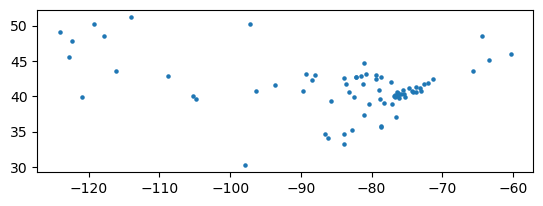

In [31]:
# Convert DataFrame to GeoDataFrame

gdf = gdp.GeoDataFrame(hogs,geometry=gdp.points_from_xy(hogs.longitude,hogs.latitude))

# Plot
gdf.plot(marker="o", markersize=5)

# Ground Hogs location on the map

In [36]:
# Using folium to plot the hogs sightings
map = folium.Map(location=[hogs["latitude"].mean(),
                           hogs["longitude"].mean()],
                 zoom_start=4)


# Add points

for _, row in hogs.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]], popup=row["slug"]).add_to(map)
    

# Display

map
